In [1]:
import pandas as pd
import numpy as np
#import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly as py

In [2]:
data = pd.read_csv("emissions.csv")
subset_attributes = ['Emissions.Type.CO2', 'Emissions.Sector.Power Industry', 'Emissions.Sector.Buildings',
'Emissions.Sector.Transport', 'Emissions.Sector.Other Industry', 'Emissions.Sector.Other sectors',
'Ratio.Per Capita', 'Ratio.Per GDP']
rs = round(data[subset_attributes].describe(),2)
print(rs)

country = data['Country'].unique().tolist()

co2_year1 = []
co2_year2 = []
co2_year3 = []
co2_year4 = []
for c in country:
    co2_year1.append(data.query("Country == @c and Year == [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]")["Emissions.Type.CO2"].mean())
    co2_year2.append(data.query("Country == @c and Year == [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]")["Emissions.Type.CO2"].mean())
    co2_year3.append(data.query("Country == @c and Year == [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1939]")["Emissions.Type.CO2"].mean())
    co2_year4.append(data.query("Country == @c and Year == [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]")["Emissions.Type.CO2"].mean())



power_year1 = []
power_year2 = []
power_year3 = []
power_year4 = []
for c in country:
    power_year1.append(data.query("Country == @c and Year == [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]")["Emissions.Sector.Power Industry"].mean())
    power_year2.append(data.query("Country == @c and Year == [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]")["Emissions.Sector.Power Industry"].mean())
    power_year3.append(data.query("Country == @c and Year == [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1939]")["Emissions.Sector.Power Industry"].mean())
    power_year4.append(data.query("Country == @c and Year == [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]")["Emissions.Sector.Power Industry"].mean())



buildings_year1 = []
buildings_year2 = []
buildings_year3 = []
buildings_year4 = []
for c in country:
    buildings_year1.append(data.query("Country == @c and Year == [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]")["Emissions.Sector.Buildings"].mean())
    buildings_year2.append(data.query("Country == @c and Year == [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]")["Emissions.Sector.Buildings"].mean())
    buildings_year3.append(data.query("Country == @c and Year == [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1939]")["Emissions.Sector.Buildings"].mean())
    buildings_year4.append(data.query("Country == @c and Year == [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]")["Emissions.Sector.Buildings"].mean())

transport_year1 = []
transport_year2 = []
transport_year3 = []
transport_year4 = []
for c in country:
    transport_year1.append(data.query("Country == @c and Year == [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]")["Emissions.Sector.Transport"].mean())
    transport_year2.append(data.query("Country == @c and Year == [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]")["Emissions.Sector.Transport"].mean())
    transport_year3.append(data.query("Country == @c and Year == [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1939]")["Emissions.Sector.Transport"].mean())
    transport_year4.append(data.query("Country == @c and Year == [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]")["Emissions.Sector.Transport"].mean())


otherind_year1 = []
otherind_year2 = []
otherind_year3 = []
otherind_year4 = []
for c in country:
    otherind_year1.append(data.query("Country == @c and Year == [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]")["Emissions.Sector.Other Industry"].mean())
    otherind_year2.append(data.query("Country == @c and Year == [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]")["Emissions.Sector.Other Industry"].mean())
    otherind_year3.append(data.query("Country == @c and Year == [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1939]")["Emissions.Sector.Other Industry"].mean())
    otherind_year4.append(data.query("Country == @c and Year == [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]")["Emissions.Sector.Other Industry"].mean())


other_year1 = []
other_year2 = []
other_year3 = []
other_year4 = []
for c in country:
    other_year1.append(data.query("Country == @c and Year == [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]")["Emissions.Sector.Other sectors"].mean())
    other_year2.append(data.query("Country == @c and Year == [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]")["Emissions.Sector.Other sectors"].mean())
    other_year3.append(data.query("Country == @c and Year == [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1939]")["Emissions.Sector.Other sectors"].mean())
    other_year4.append(data.query("Country == @c and Year == [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]")["Emissions.Sector.Other sectors"].mean())


gdp_year1 = []
gdp_year2 = []
gdp_year3 = []
gdp_year4 = []
for c in country:
    gdp_year1.append(data.query("Country == @c and Year == [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]")["Ratio.Per GDP"].mean())
    gdp_year2.append(data.query("Country == @c and Year == [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]")["Ratio.Per GDP"].mean())
    gdp_year3.append(data.query("Country == @c and Year == [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1939]")["Ratio.Per GDP"].mean())
    gdp_year4.append(data.query("Country == @c and Year == [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]")["Ratio.Per GDP"].mean())


capita_year1 = []
capita_year2 = []
capita_year3 = []
capita_year4 = []
for c in country:
    capita_year1.append(data.query("Country == @c and Year == [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]")["Ratio.Per Capita"].mean())
    capita_year2.append(data.query("Country == @c and Year == [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]")["Ratio.Per Capita"].mean())
    capita_year3.append(data.query("Country == @c and Year == [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1939]")["Ratio.Per Capita"].mean())
    capita_year4.append(data.query("Country == @c and Year == [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]")["Ratio.Per Capita"].mean())


data1 = {'Country': country,
        'Emissions.Type.CO2': co2_year1,
        'Emissions.Sector.Power Industry': power_year1,
        'Emissions.Sector.Buildings': buildings_year1,
        'Emissions.Sector.Transport': transport_year1,
        'Emissions.Sector.Other Industry': otherind_year1,
        'Emissions.Sector.Other sectors': other_year1,
        'Ratio.Per GDP': gdp_year1,
        'Ratio.Per Capita': capita_year1}
df1 = pd.DataFrame(data1)

data2 = {'Country': country,
        'Emissions.Type.CO2': co2_year2,
        'Emissions.Sector.Power Industry': power_year2,
        'Emissions.Sector.Buildings': buildings_year2,
        'Emissions.Sector.Transport': transport_year2,
        'Emissions.Sector.Other Industry': otherind_year2,
        'Emissions.Sector.Other sectors': other_year2,
        'Ratio.Per GDP': gdp_year2,
        'Ratio.Per Capita': capita_year2}
df2 = pd.DataFrame(data2)

data3 = {'Country': country,
        'Emissions.Type.CO2': co2_year3,
        'Emissions.Sector.Power Industry': power_year3,
        'Emissions.Sector.Buildings': buildings_year3,
        'Emissions.Sector.Transport': transport_year3,
        'Emissions.Sector.Other Industry': otherind_year3,
        'Emissions.Sector.Other sectors': other_year3,
        'Ratio.Per GDP': gdp_year3,
        'Ratio.Per Capita': capita_year3}
df3 = pd.DataFrame(data3)

data4 = {'Country': country,
        'Emissions.Type.CO2': co2_year4,
        'Emissions.Sector.Power Industry': power_year4,
        'Emissions.Sector.Buildings': buildings_year4,
        'Emissions.Sector.Transport': transport_year4,
        'Emissions.Sector.Other Industry': otherind_year4,
        'Emissions.Sector.Other sectors': other_year4,
        'Ratio.Per GDP': gdp_year4,
        'Ratio.Per Capita': capita_year4}
df4 = pd.DataFrame(data4)

# df1.to_csv("year1.csv")
# df2.to_csv("year2.csv")
# df3.to_csv("year3.csv")
# df4.to_csv("year4.csv")

       Emissions.Type.CO2  Emissions.Sector.Power Industry  \
count             8385.00                          8385.00   
mean             10758.08                            40.05   
std              36931.23                           199.93   
min                  0.07                             0.00   
25%                264.00                             0.09   
50%               1600.00                             1.26   
75%               6180.00                            12.69   
max             525000.00                          4154.02   

       Emissions.Sector.Buildings  Emissions.Sector.Transport  \
count                     8385.00                     8385.00   
mean                        16.39                       21.00   
std                         65.28                      110.88   
min                          0.00                        0.00   
25%                          0.11                        0.22   
50%                          0.66                  

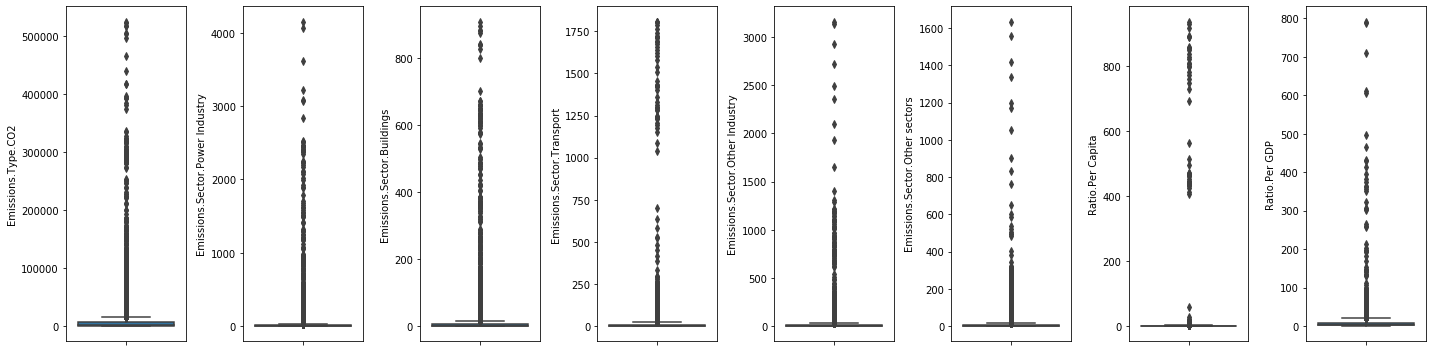

In [3]:
# summary statistics visualization using box plots
num_columns = len(data[subset_attributes].columns)
fig, axes = plt.subplots(1, num_columns, figsize = (20, 5))
for i in range(num_columns):
    sns.boxplot(y = data[subset_attributes].columns[i], data = data[subset_attributes], orient = 'v', ax = axes[i])
plt.tight_layout()

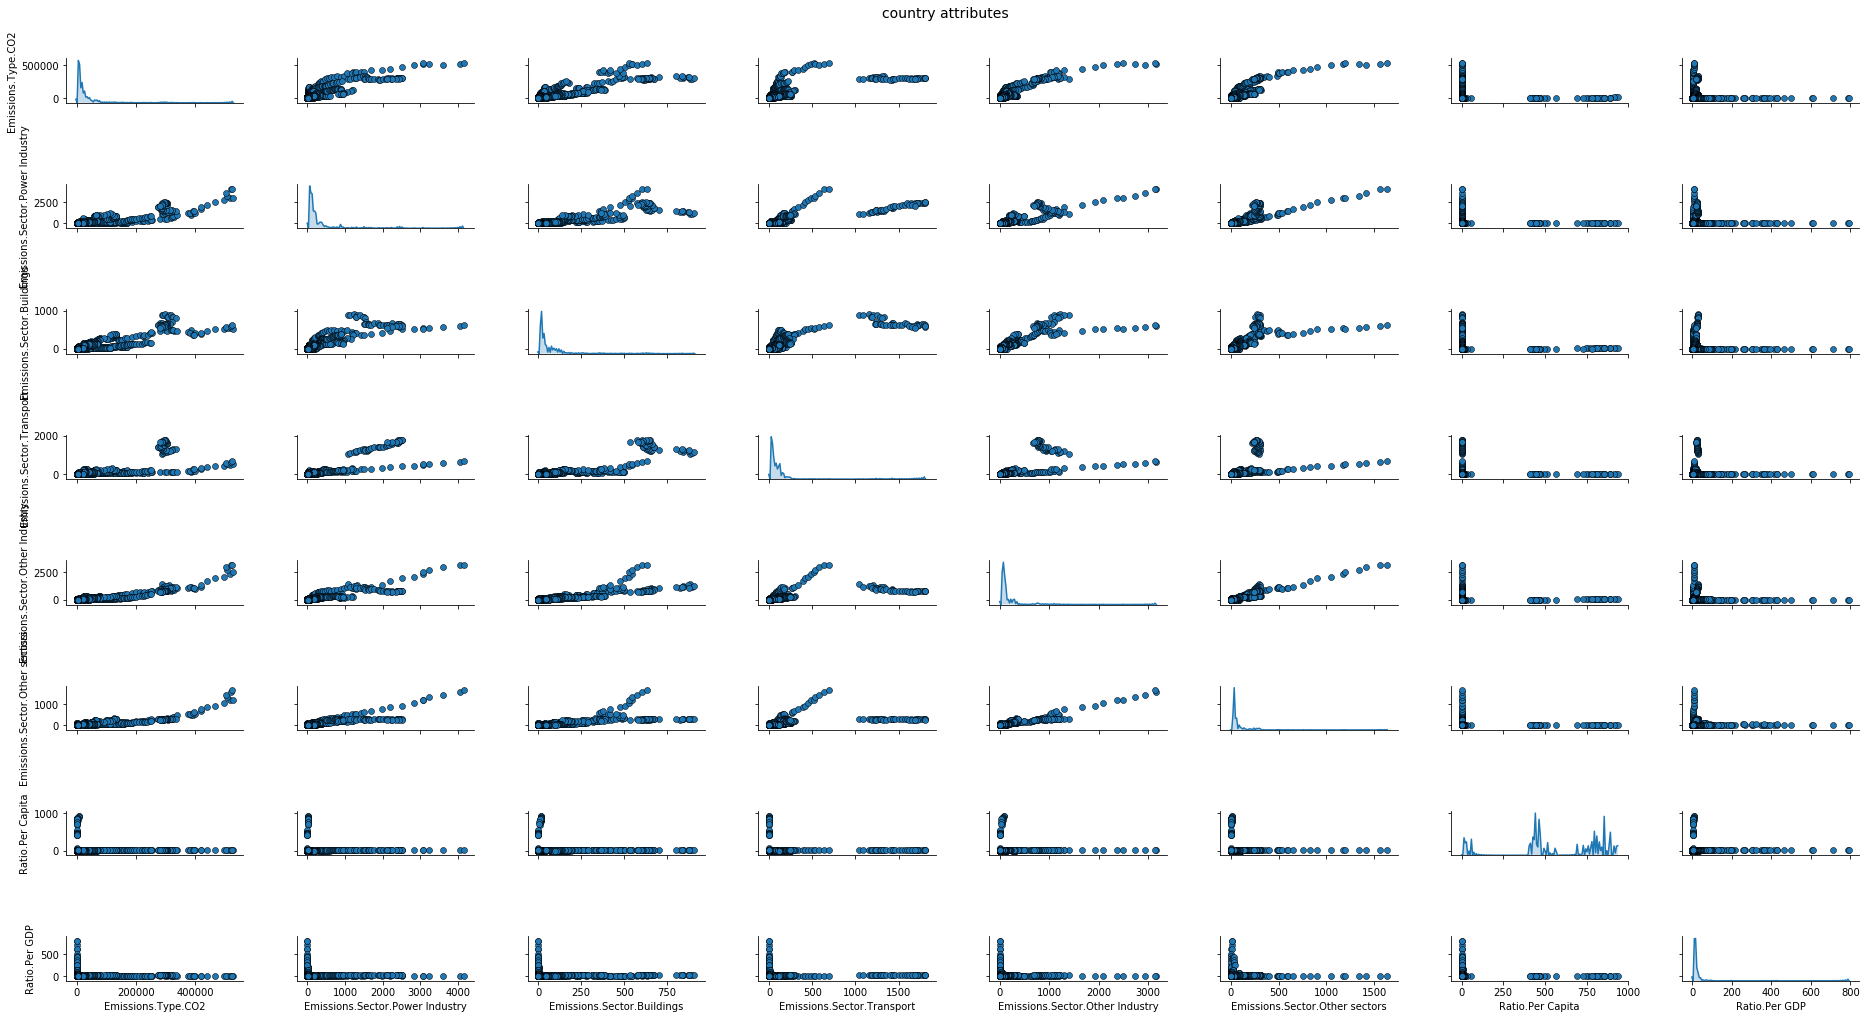

In [4]:
cols = ['Emissions.Type.CO2', 'Emissions.Sector.Power Industry', 'Emissions.Sector.Buildings',
'Emissions.Sector.Transport', 'Emissions.Sector.Other Industry', 'Emissions.Sector.Other sectors',
'Ratio.Per Capita', 'Ratio.Per GDP']
pp = sns.pairplot(data[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('country attributes', fontsize=14)

In [5]:
var = ['Emissions.Sector.Power Industry', 'Emissions.Sector.Buildings','Emissions.Sector.Transport']
scaler = StandardScaler()

In [7]:
# map 2012
data2012 = data[(data['Year'] > 2011) & (data['Country'] != 'North Korea')].reset_index()
dataSubSet = data2012[var]
scaler.fit(dataSubSet)
dataSubSetScaled = scaler.transform(dataSubSet)

clustering = DBSCAN(eps=.25).fit(dataSubSetScaled)
clusters2012 = clustering.labels_
silhouette_coefficient = metrics.silhouette_score(dataSubSetScaled, clusters2012)
print(silhouette_coefficient)

data2012['Development Status'] = clusters2012
dataTemp = data2012[data2012['Development Status']< 0].reset_index()
countries = dataTemp['Country'].tolist()
emissions = dataTemp['Emissions.Type.CO2']

dataC = dict (
    type = 'choropleth',
    locations = countries,
    locationmode='country names',
    z=emissions)

#map = go.Figure(data=[dataC])
#map.show()
#py.offline.plot(map)

0.8190767596521348


In [8]:
# map all
dataAll = data[(data['Year'] > 2011) & (data['Country'] != 'North Korea')].reset_index()
i = 0
countryList = dataAll['Country'].tolist()
for country in countryList:
    tempDF = data[data['Country'] == country]
    dataAll.at[i, 'Emissions.Sector.Power Industry'] = np.average(tempDF['Emissions.Sector.Power Industry'].values)
    dataAll.at[i, 'Emissions.Sector.Buildings'] = np.average(tempDF['Emissions.Sector.Buildings'].values)
    dataAll.at[i, 'Emissions.Sector.Transport'] = np.average(tempDF['Emissions.Sector.Transport'].values)
    dataAll.at[i, 'Emissions.Type.CO2'] = np.average(tempDF['Emissions.Type.CO2'].values)
    i += 1
dataSubSetAll = dataAll[var]
scaler.fit(dataSubSetAll)
dataSubSetScaled = scaler.transform(dataSubSetAll)

clustering = DBSCAN(eps=.25).fit(dataSubSetScaled)
clustersAll = clustering.labels_
silhouette_coefficient = metrics.silhouette_score(dataSubSetScaled, clustersAll)
print(silhouette_coefficient)

dataAll['Development Status'] = clustersAll
dataTemp = dataAll[dataAll['Development Status']< 0].reset_index()
countries = dataTemp['Country'].tolist()
emissions = dataTemp['Emissions.Type.CO2']

dataC = dict (
    type = 'choropleth',
    locations = countries,
    locationmode='country names',
    z=emissions)

#map = go.Figure(data=[dataC])
#py.offline.plot(map)
#map.show()

0.8215983804840775


In [9]:
# map year 1
data1 = df1

dataSubSet = data1[var]
scaler.fit(dataSubSet)
dataSubSetScaled = scaler.transform(dataSubSet)
clustering = DBSCAN(eps=.25).fit(dataSubSetScaled)
clusters1= clustering.labels_
silhouette_coefficient = metrics.silhouette_score(dataSubSetScaled, clusters1)
print(silhouette_coefficient)

data1['Development Status'] = clusters1
dataTemp = data1[data1['Development Status']< 0].reset_index()
countries = dataTemp['Country'].tolist()
emissions = dataTemp['Emissions.Type.CO2']

dataC = dict (
    type = 'choropleth',
    locations = countries,
    locationmode='country names',
    z=emissions)
#map = go.Figure(data=[dataC])
#py.offline.plot(map)
#map.show()

0.8660447542589244


In [10]:
# map year 2
data2 = df2
dataSubSet = data2[var]
scaler.fit(dataSubSet)
dataSubSetScaled = scaler.transform(dataSubSet)
clustering = DBSCAN(eps=.25).fit(dataSubSetScaled)
clusters2 = clustering.labels_
silhouette_coefficient = metrics.silhouette_score(dataSubSetScaled, clusters2)
print(silhouette_coefficient)

data2['Development Status'] = clusters2
dataTemp = data2[data2['Development Status']< 0].reset_index()
countries = dataTemp['Country'].tolist()
emissions = dataTemp['Emissions.Type.CO2']

dataC = dict (
    type = 'choropleth',
    locations = countries,
    locationmode='country names',
    z=emissions)

#map = go.Figure(data=[dataC])
#py.offline.plot(map)
#map.show()

0.835993962937506


In [11]:
# map year 3
data3 = df3
dataSubSet = data3[var]
scaler.fit(dataSubSet)
dataSubSetScaled = scaler.transform(dataSubSet)
clustering = DBSCAN(eps=.25).fit(dataSubSetScaled)
clusters3 = clustering.labels_
silhouette_coefficient = metrics.silhouette_score(dataSubSetScaled, clusters3)
print(silhouette_coefficient)

data3['Development Status'] = clusters3
dataTemp = data3[data3['Development Status']< 0].reset_index()
countries = dataTemp['Country'].tolist()
emissions = dataTemp['Emissions.Type.CO2']

dataC = dict (
    type = 'choropleth',
    locations = countries,
    locationmode='country names',
    z=emissions)

#map = go.Figure(data=[dataC])
#py.offline.plot(map)
#map.show()

0.8228159276630683


In [12]:
# map year 4
data4 = df4
dataSubSet = data4[var]
scaler.fit(dataSubSet)
dataSubSetScaled = scaler.transform(dataSubSet)
clustering = DBSCAN(eps=.25).fit(dataSubSetScaled)
clusters4 = clustering.labels_
silhouette_coefficient = metrics.silhouette_score(dataSubSetScaled, clusters4)
print(silhouette_coefficient)

data4['Development Status'] = clusters4
dataTemp = data4[data4['Development Status']< 0].reset_index()
countries = dataTemp['Country'].tolist()
emissions = dataTemp['Emissions.Type.CO2']

dataC = dict (
    type = 'choropleth',
    locations = countries,
    locationmode='country names',
    z=emissions)

#map = go.Figure(data=[dataC])
#py.offline.plot(map)
#map.show()

0.8068388517718879


              precision    recall  f1-score   support

           0       0.88      0.91      0.89       161
           1       0.48      0.41      0.44        34

    accuracy                           0.82       195
   macro avg       0.68      0.66      0.67       195
weighted avg       0.81      0.82      0.81       195



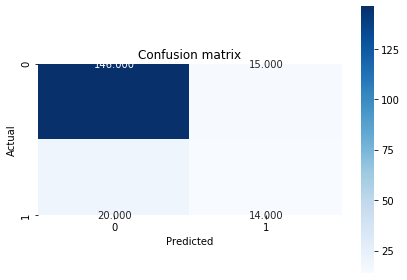

In [13]:
#classification year 4
from sklearn.model_selection import train_test_split
dev = pd.read_csv("development.csv")

#join datasets
result = pd.concat([data4[var], dev], axis=1, sort=False)
result = result.fillna(0)
#result.to_csv("result.csv")

x_train,x_test,y_train,y_test = train_test_split(result[var], result["Development Status"], test_size = 0.2)

# Standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

from sklearn.svm import SVC
# CLASSIFIER: Linear SVM
classifier = SVC(kernel = 'linear') 
classifier.fit(x_train, y_train)

# Predict class labels using kernel SVM classifier
y_pred = classifier.predict(result[var])

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(result["Development Status"], y_pred)
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

print(classification_report(result["Development Status"], y_pred))

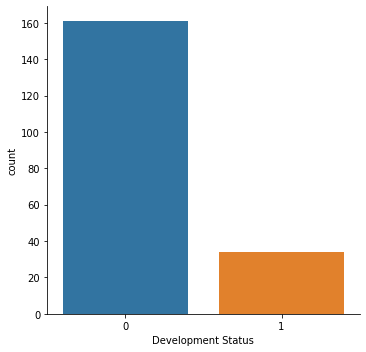

In [14]:
#before linear SVM
sns.catplot(x="Development Status", kind = "count", data=dev)

In [15]:
#developed countries before classification
result["status"] = result['Development Status']
before = result['Country'].loc[result.status == 1]
print(before)

8              Australia
9                Austria
16               Belgium
26              Bulgaria
31                Canada
47               Czechia
48               Denmark
57               Estonia
60               Finland
61     France and Monaco
66               Germany
68                Greece
78               Hungary
79               Iceland
84               Ireland
86                 Italy
88                 Japan
98                Latvia
103            Lithuania
104           Luxembourg
112                Malta
123          Netherlands
125          New Zealand
129               Norway
138               Poland
139             Portugal
142              Romania
156             Slovakia
157             Slovenia
161    Spain and Andorra
165            Swaziland
166               Sweden
184       United Kingdom
185        United States
Name: Country, dtype: object


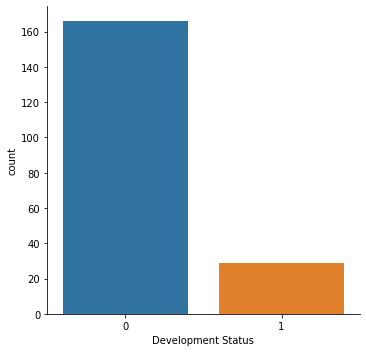

In [16]:
#after Linear SVM
after =  pd.DataFrame(y_pred, columns = ['Development Status']) 
sns.catplot(x="Development Status", kind = "count", data=after)

In [17]:
#countries classified as developed by SVM
result["after"] = after
grouped = result.groupby("after")
print(result['Country'].loc[result.after == 1])
result.to_csv("result.csv")

2                            Algeria
6                          Argentina
9                            Austria
16                           Belgium
24                            Brazil
31                            Canada
38                          Colombia
52                           Ecuador
61                 France and Monaco
78                           Hungary
81                         Indonesia
82                              Iran
84                           Ireland
86                             Italy
104                       Luxembourg
115                           Mexico
123                      Netherlands
125                      New Zealand
128                          Nigeria
129                           Norway
131                         Pakistan
136                             Peru
161                Spain and Andorra
166                           Sweden
167    Switzerland and Liechtenstein
179                     Turkmenistan
184                   United Kingdom
1

In [18]:
#countries classified correctly by SVM
resultAfter = result.loc[result.after == 1]
both = resultAfter['Country'].loc[resultAfter.status == 1]
print(both)

9                Austria
16               Belgium
31                Canada
61     France and Monaco
78               Hungary
84               Ireland
86                 Italy
104           Luxembourg
123          Netherlands
125          New Zealand
129               Norway
161    Spain and Andorra
166               Sweden
184       United Kingdom
Name: Country, dtype: object
